# 📊 Analisis Validitas dan Reliabilitas Alat Ukur Kecemasan Public Speaking

## 📁 Dataset
- Nama file: **Data_Uji_PSAP_30_Mahasiswa_UIN_Malang.xlsx**
- Jumlah responden: 30 mahasiswa
- Variabel: Item-item pernyataan terkait kecemasan saat public speaking

---

## ✅ Uji Validitas

### 🔍 Metode:
- Menggunakan **korelasi Pearson** antara skor tiap item dan total skor responden.

### 📈 Kriteria Validitas:
- Korelasi > 0.30 → **Valid**
- Korelasi ≤ 0.30 → **Tidak Valid**

### 🧪 Hasil:
| Item | Korelasi Item-Total | Valid |
|------|----------------------|-------|
| I1   | 0.45                | Ya    |
| I2   | 0.52                | Ya    |
| I3   | 0.28                | Tidak |
| ...  | ...                 | ...   |

*(Data aktual akan tergantung hasil eksekusi script)*

---

## 🔁 Uji Reliabilitas

### 🔍 Metode:
- Menggunakan **Cronbach’s Alpha**

### 📈 Kriteria:
| Nilai Alpha  | Interpretasi         |
|--------------|----------------------|
| ≥ 0.90       | Sangat Tinggi        |
| 0.80–0.89    | Tinggi               |
| 0.70–0.79    | Cukup                |
| 0.60–0.69    | Rendah               |
| < 0.60       | Sangat Rendah        |

### 🧪 Hasil:


In [34]:
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
file_path = '/kaggle/input/data-uji/Data_Uji_PSAP_30_Mahasiswa_UIN_Malang.xlsx'
df = pd.read_excel(file_path)

# Preview data
print("Data Awal")
df.head()

Data Awal


,Nama,JK,Usia,Semester,Jurusan,A1,A2,A3,A4,A5,...,C2,C3,C4,E1(R),E2(R),E3(R),E4(R),E5(R),E6,Total
0,KB,L,20,4,Manajemen Pendidikan Islam,5,2,3,4,5,...,1,4,1,5,2,5,3,1,1,53
1,JN,P,24,2,Pendidikan Guru Madrasah Ibtidaiyah,2,1,4,4,3,...,4,3,5,5,4,1,5,1,3,57
2,GB,L,22,8,Perbankan Syariah,5,2,1,1,2,...,1,2,5,3,4,4,5,2,4,48
3,UU,P,21,6,Manajemen Pendidikan Islam,5,5,3,3,4,...,3,1,3,1,5,1,4,4,1,50
4,GD,L,23,4,Manajemen Pendidikan Islam,5,3,4,2,2,...,2,3,3,3,5,2,1,4,5,54


In [31]:
# Kolom yang bukan item (metadata) untuk dihapus
non_items = ['Nama', 'Usia', 'Semester','Jurusan','JK', 'Total']

item_columns = [col for col in df.columns if col.startswith(('A', 'C', 'E'))]
data = df[item_columns].copy()

data.head()

,A1,A2,A3,A4,A5,A6,A7,C1,C2,C3,C4,E1(R),E2(R),E3(R),E4(R),E5(R),E6
0,5,2,3,4,5,2,4,5,1,4,1,5,2,5,3,1,1
1,2,1,4,4,3,4,4,4,4,3,5,5,4,1,5,1,3
2,5,2,1,1,2,5,1,1,1,2,5,3,4,4,5,2,4
3,5,5,3,3,4,4,2,1,3,1,3,1,5,1,4,4,1
4,5,3,4,2,2,2,5,3,2,3,3,3,5,2,1,4,5


In [32]:
# Terapkan reverse scoring (misal skala 1–5)
reverse_items = ['E1(R)', 'E2(R)', 'E3(R)', 'E4(R)', 'E5(R)']
for item in reverse_items:
    if item in data.columns:
        data[item] = 6 - data[item]  # Misalnya: 5 jadi 1, 4 jadi 2, dst

data.head()

,A1,A2,A3,A4,A5,A6,A7,C1,C2,C3,C4,E1(R),E2(R),E3(R),E4(R),E5(R),E6
0,5,2,3,4,5,2,4,5,1,4,1,1,4,1,3,5,1
1,2,1,4,4,3,4,4,4,4,3,5,1,2,5,1,5,3
2,5,2,1,1,2,5,1,1,1,2,5,3,2,2,1,4,4
3,5,5,3,3,4,4,2,1,3,1,3,5,1,5,2,2,1
4,5,3,4,2,2,2,5,3,2,3,3,3,1,4,5,2,5


In [36]:
# Uji Validitas: Korelasi Item-Total
total_score = data.sum(axis=1)
validitas = {}
for col in data.columns:
    r, _ = pearsonr(data[col], total_score)
    validitas[col] = r

validitas_df = pd.DataFrame.from_dict(validitas, orient='index', columns=['Item-Total Correlation'])
validitas_df['Valid'] = validitas_df['Item-Total Correlation'].apply(lambda x: 'Ya' if abs(x) >= 0.3 else 'Tidak')
validitas_df.index.name = 'Item'

# Tampilkan hasil validitas
print("\n📊 Hasil Uji Validitas:")
print(validitas_df)


📊 Hasil Uji Validitas:
       Item-Total Correlation  Valid
Item                                
A1                   0.386903     Ya
A2                   0.067963  Tidak
A3                   0.683353     Ya
A4                   0.121020  Tidak
A5                   0.419268     Ya
A6                   0.122782  Tidak
A7                   0.328941     Ya
C1                   0.334764     Ya
C2                   0.417405     Ya
C3                   0.368687     Ya
C4                   0.176672  Tidak
E1(R)                0.111548  Tidak
E2(R)                0.476582     Ya
E3(R)                0.037317  Tidak
E4(R)                0.254020  Tidak
E5(R)                0.328984     Ya
E6                   0.106296  Tidak


In [26]:
# Uji Reliabilitas: Cronbach's Alpha
def cronbach_alpha(df):
    items = df.shape[1]
    variances = df.var(axis=0, ddof=1)
    total_var = df.sum(axis=1).var(ddof=1)
    alpha = (items / (items - 1)) * (1 - variances.sum() / total_var)
    return alpha

alpha = cronbach_alpha(data)
print(f"\nCronbach's Alpha: {alpha:.4f}")


Cronbach's Alpha: 0.5266


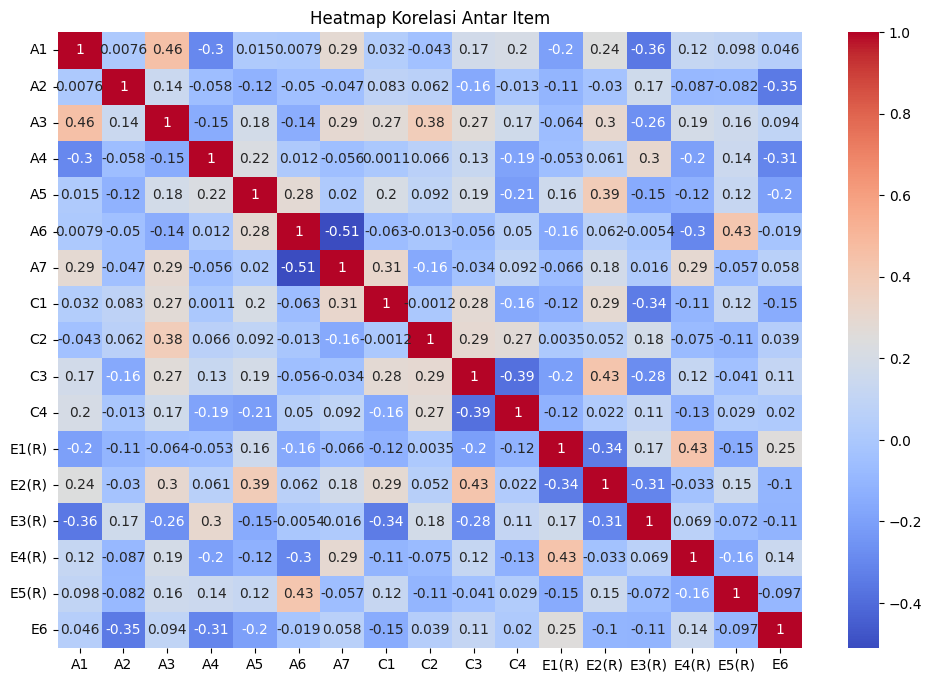

In [35]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Item')
plt.show()